In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.492825,0.592149,0.576450,0.738316,0.411216,0.554485,0.367785,0.483998,0.296604,0.406063,0.181587,0.370326,0.323947,0.773659,4
1,1997-02-28 00:00:00,0.030303,#VALUE!,#VALUE!,0.578927,0.558017,0.514660,0.624385,0.395695,0.415181,0.289185,0.404881,0.278218,0.374875,0.161709,0.338374,0.319785,0.783264,4
2,1997-03-31 00:00:00,0.000000,#VALUE!,#VALUE!,0.580438,0.872439,0.375946,0.569335,0.390152,0.488696,0.212427,0.369817,0.252937,0.376553,0.251378,0.443947,0.315132,0.745390,4
3,1997-04-30 00:00:00,0.024242,#VALUE!,#VALUE!,0.344789,0.347304,0.305958,0.347329,0.290743,0.310726,0.209971,0.260192,0.252681,0.305611,0.243253,0.382426,0.277057,0.639667,4
4,1997-05-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.246601,0.439709,0.341267,0.257878,0.232354,0.301562,0.217954,0.296403,0.299157,0.361117,0.265888,0.431798,0.222821,0.677654,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.490909091


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.604727,0.605700,0.510508,0.620340,0.504229,0.635122,0.510406,0.629262,0.494641,0.570318,0.437922,0.629057,0.503970,2.220000
std,0.115566,0.264150,0.156355,0.225349,0.167108,0.221827,0.174169,0.230749,0.182911,0.185639,0.190455,0.181546,0.187579,1.183043
min,0.496970,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.527273,0.443726,0.398749,0.510717,0.401366,0.539952,0.422246,0.531346,0.426771,0.500000,0.312996,0.550930,0.418180,1.000000
50%,0.554545,0.567308,0.512742,0.651053,0.534602,0.624770,0.521687,0.603422,0.497683,0.601422,0.464278,0.630999,0.511549,2.000000
75%,0.642424,0.815416,0.632442,0.734756,0.615321,0.755718,0.588585,0.780133,0.557253,0.676146,0.534373,0.696621,0.564906,3.000000
max,0.987879,1.000000,0.844141,1.000000,0.793388,1.000000,0.893224,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 3-mo (Treasury)   50.0  0.605700  0.264150  0.037356   
 2                         combined  100.0  0.605214  0.202844  0.020284   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.530629  0.680770  
 2   0.564965  0.645462  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...  -0.0010
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.0239
 3                           Two side test p value =    0.9810
 4                          Difference < 0 p value =    0.4905
 5                          Difference > 0 p value =    0.5095
 6                                       Cohen's d =   -0.0048
 7                                       Hedge's g =   -0.0047
 8                    

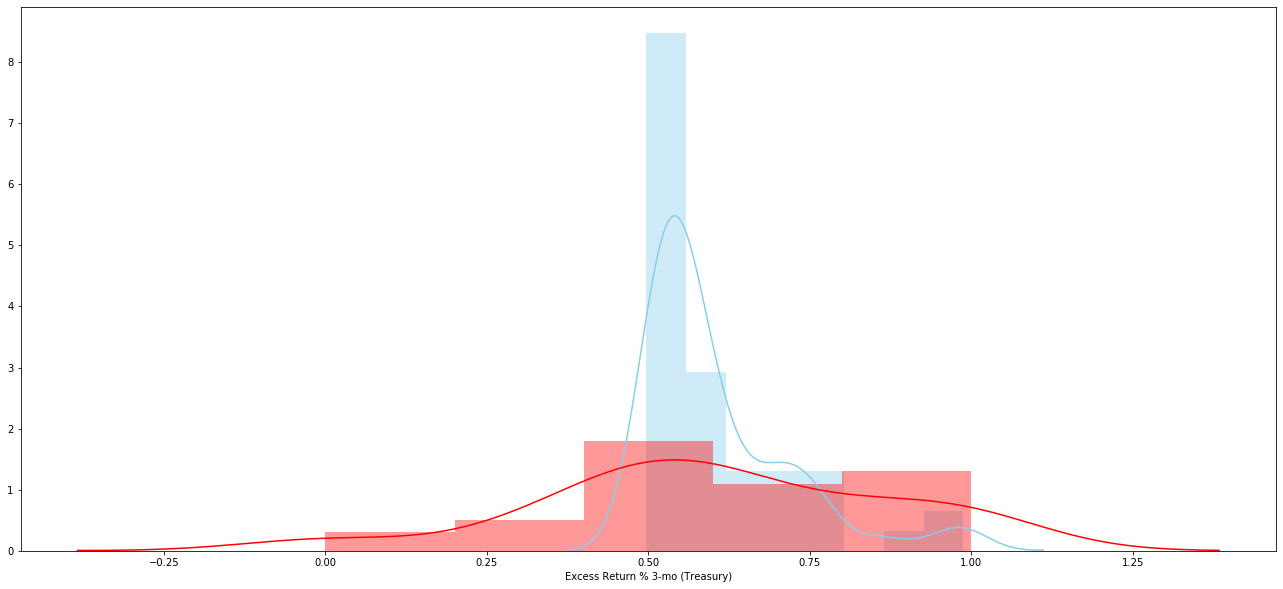

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 3-mo (Agg)   50.0  0.510508  0.156355  0.022112   0.466073   
 2                    combined  100.0  0.557618  0.144748  0.014475   0.528897   
 
    Interval  
 0  0.637571  
 1  0.554944  
 2  0.586339  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.0942
 1                             Degrees of freedom =   98.0000
 2                                              t =    3.4266
 3                          Two side test p value =    0.0009
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    0.6853
 7                                      Hedge's g =    0.6801
 8                                  Glass's delta =

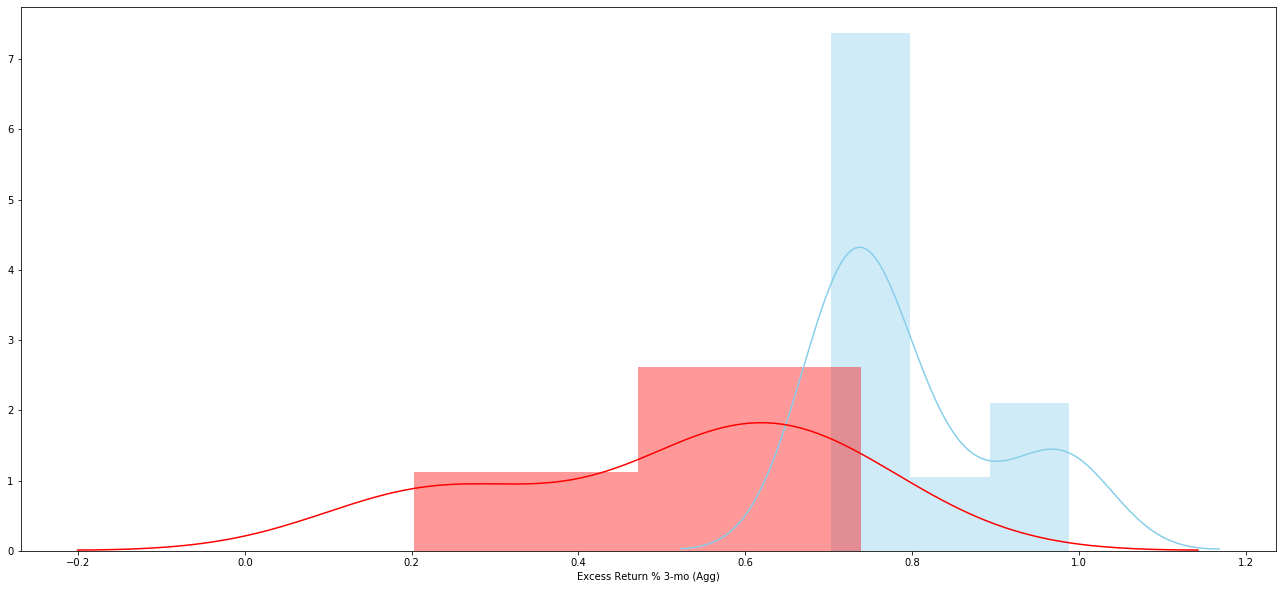

In [66]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Tres._Normalized_Value")

In [14]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 6-mo (Treasury)   50.0  0.620340  0.225349  0.031869   
 2                         combined  100.0  0.612534  0.178344  0.017834   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.556296  0.684383  
 2   0.577146  0.647921  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...  -0.0156
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.4359
 3                           Two side test p value =    0.6639
 4                          Difference < 0 p value =    0.3319
 5                          Difference > 0 p value =    0.6681
 6                                       Cohen's d =   -0.0872
 7                                       Hedge's g =   -0.0865
 8                    

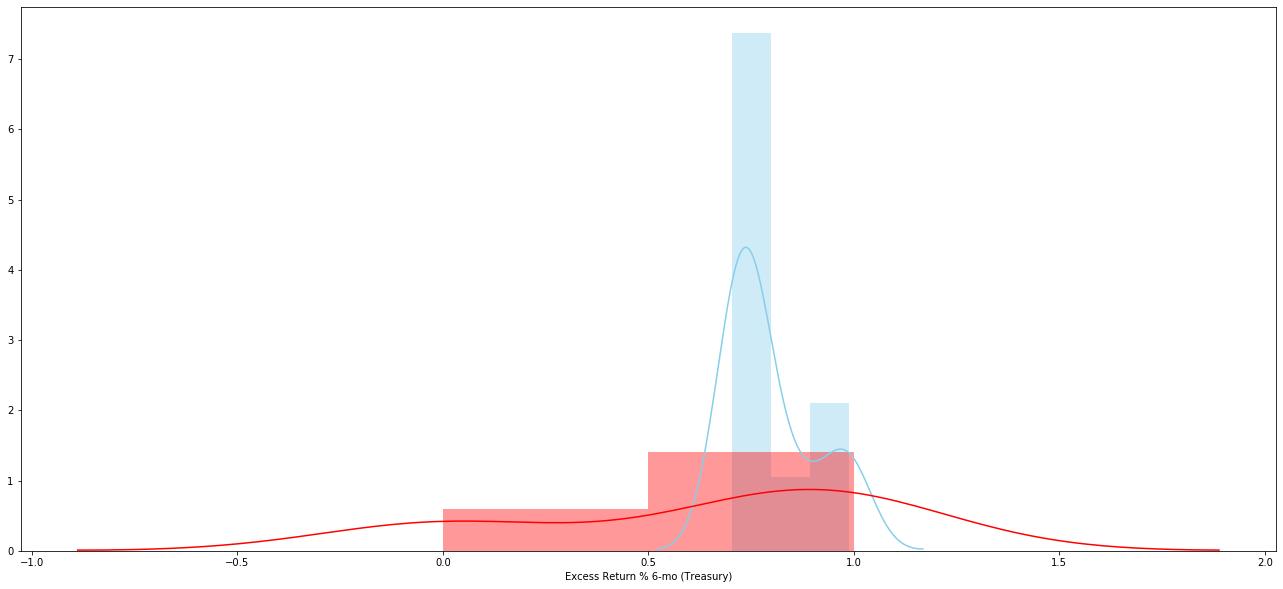

In [67]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 6-mo (Agg)   50.0  0.504229  0.167108  0.023633   0.456737   
 2                    combined  100.0  0.554478  0.151599  0.015160   0.524398   
 
    Interval  
 0  0.637571  
 1  0.551720  
 2  0.584559  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1005
 1                             Degrees of freedom =   98.0000
 2                                              t =    3.4976
 3                          Two side test p value =    0.0007
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    0.6995
 7                                      Hedge's g =    0.6942
 8                                  Glass's delta =

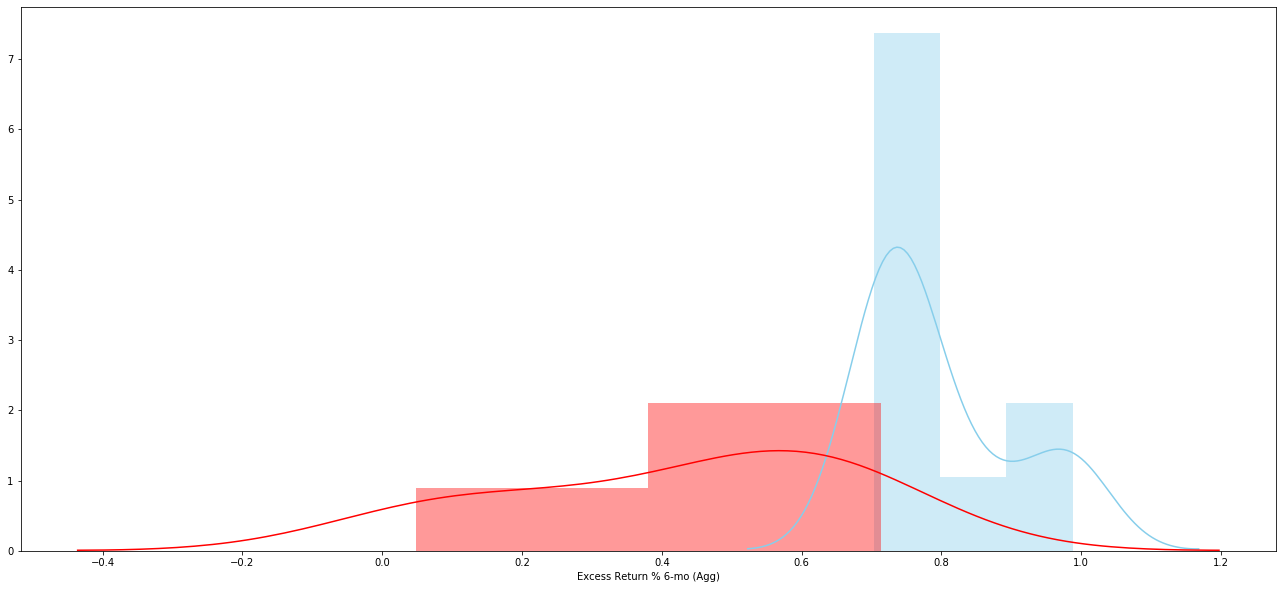

In [68]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [16]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 9-mo (Treasury)   50.0  0.635122  0.221827  0.031371   
 2                         combined  100.0  0.619925  0.176631  0.017663   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.572080  0.698165  
 2   0.584877  0.654972  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...  -0.0304
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.8593
 3                           Two side test p value =    0.3923
 4                          Difference < 0 p value =    0.1961
 5                          Difference > 0 p value =    0.8039
 6                                       Cohen's d =   -0.1719
 7                                       Hedge's g =   -0.1705
 8                    

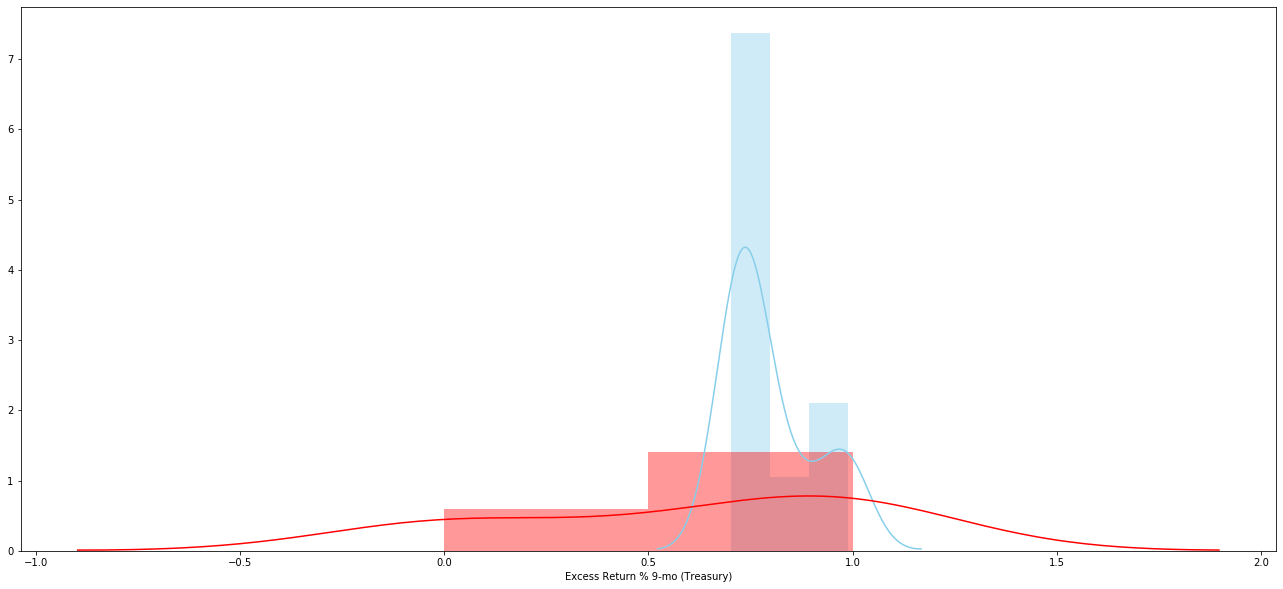

In [69]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 9-mo (Agg)   50.0  0.510406  0.174169  0.024631   0.460908   
 2                    combined  100.0  0.557567  0.154503  0.015450   0.526910   
 
    Interval  
 0  0.637571  
 1  0.559904  
 2  0.588223  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.0943
 1                             Degrees of freedom =   98.0000
 2                                              t =    3.1908
 3                          Two side test p value =    0.0019
 4                         Difference < 0 p value =    0.9990
 5                         Difference > 0 p value =    0.0010
 6                                      Cohen's d =    0.6382
 7                                      Hedge's g =    0.6333
 8                                  Glass's delta =

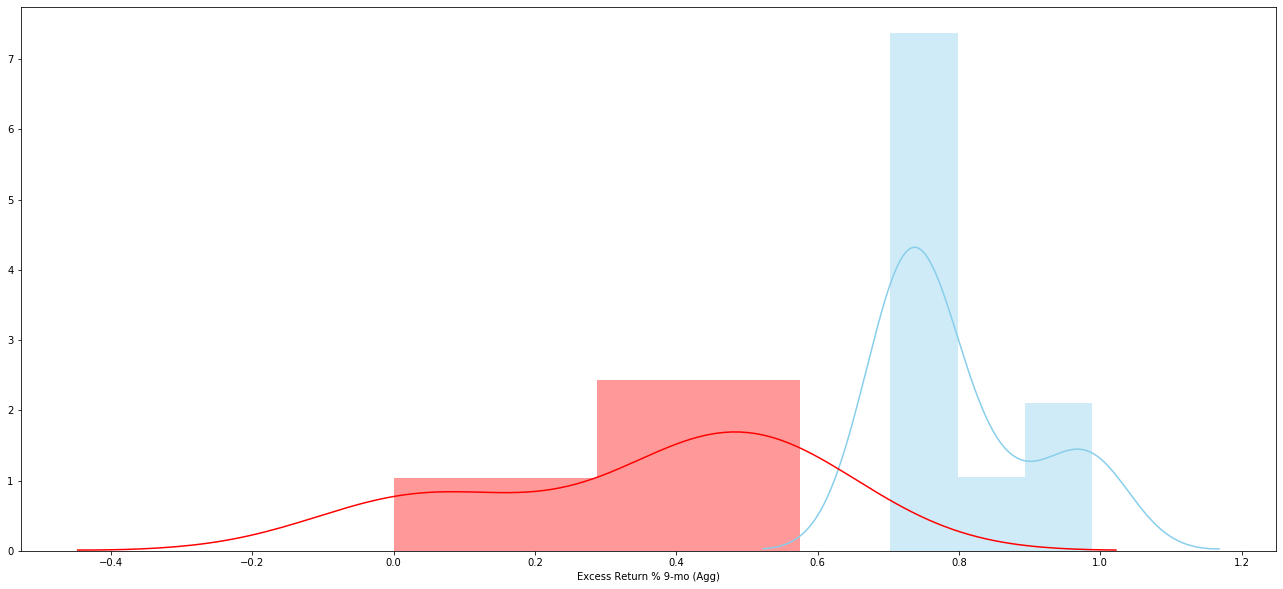

In [72]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [18]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Treasury)   50.0  0.629262  0.230749  0.032633   
 2                          combined  100.0  0.616995  0.181978  0.018198   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.563684  0.694840  
 2   0.580886  0.653103  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...  -0.0245
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.6722
 3                           Two side test p value =    0.5030
 4                          Difference < 0 p value =    0.2515
 5                          Difference > 0 p value =    0.7485
 6                                       Cohen's d =   -0.1344
 7                                       Hedge's g =   -0.1334
 8                

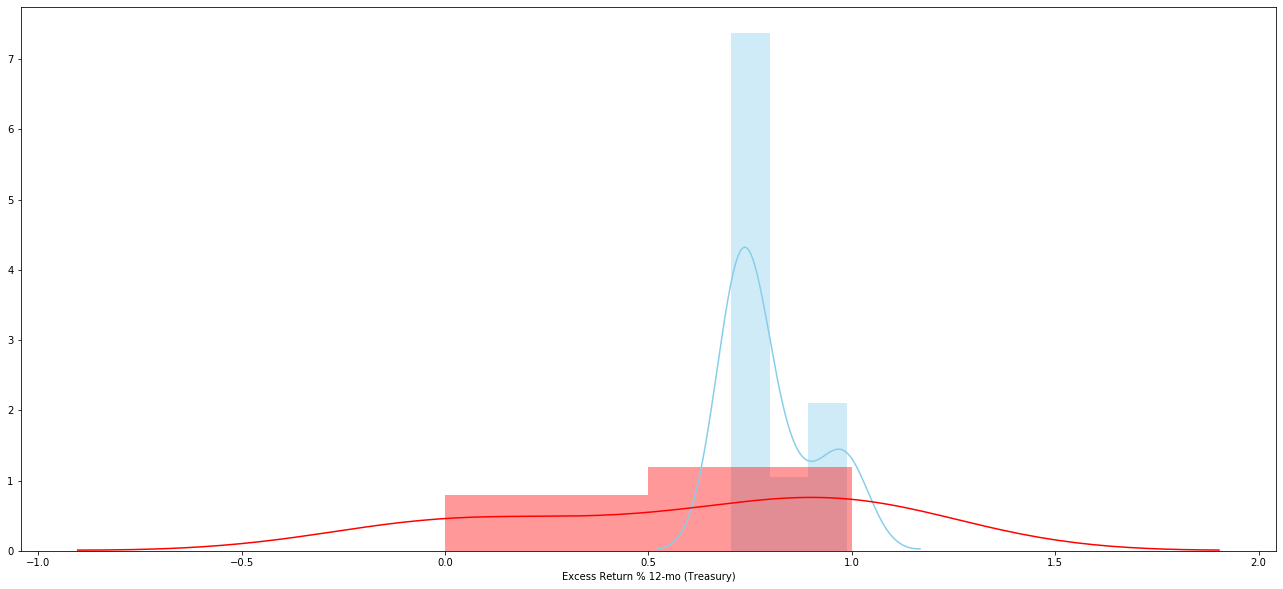

In [71]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Agg)   50.0  0.494641  0.182911  0.025868   
 2                     combined  100.0  0.549684  0.161957  0.016196   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.442659  0.546624  
 2   0.517549  0.581820  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1101
 1                              Degrees of freedom =   98.0000
 2                                               t =    3.5978
 3                           Two side test p value =    0.0005
 4                          Difference < 0 p value =    0.9997
 5                          Difference > 0 p value =    0.0003
 6                                       Cohen's d =    0.7196
 7                                       Hedge's g =    0.7140
 8                                   G

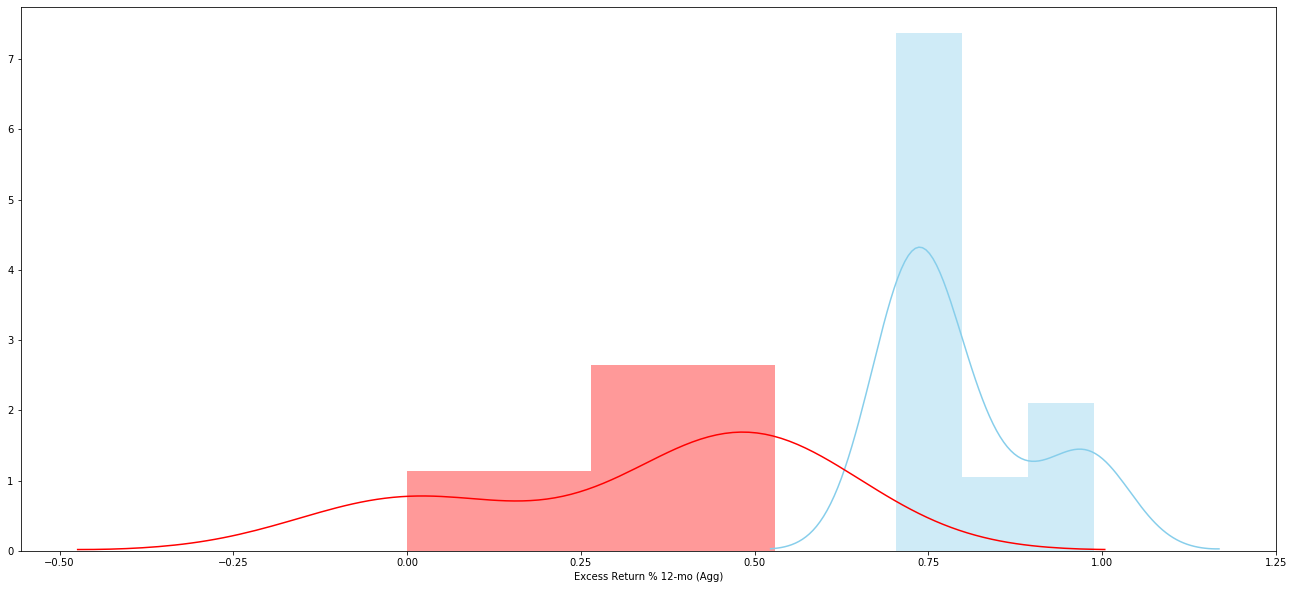

In [73]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [20]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Treasury)   50.0  0.570318  0.185639  0.026253   
 2                          combined  100.0  0.587523  0.154810  0.015481   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.517560  0.623076  
 2   0.556805  0.618240  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0344
 1                              Degrees of freedom =   98.0000
 2                                               t =    1.1127
 3                           Two side test p value =    0.2686
 4                          Difference < 0 p value =    0.8657
 5                          Difference > 0 p value =    0.1343
 6                                       Cohen's d =    0.2225
 7                                       Hedge's g =    0.2208
 8                

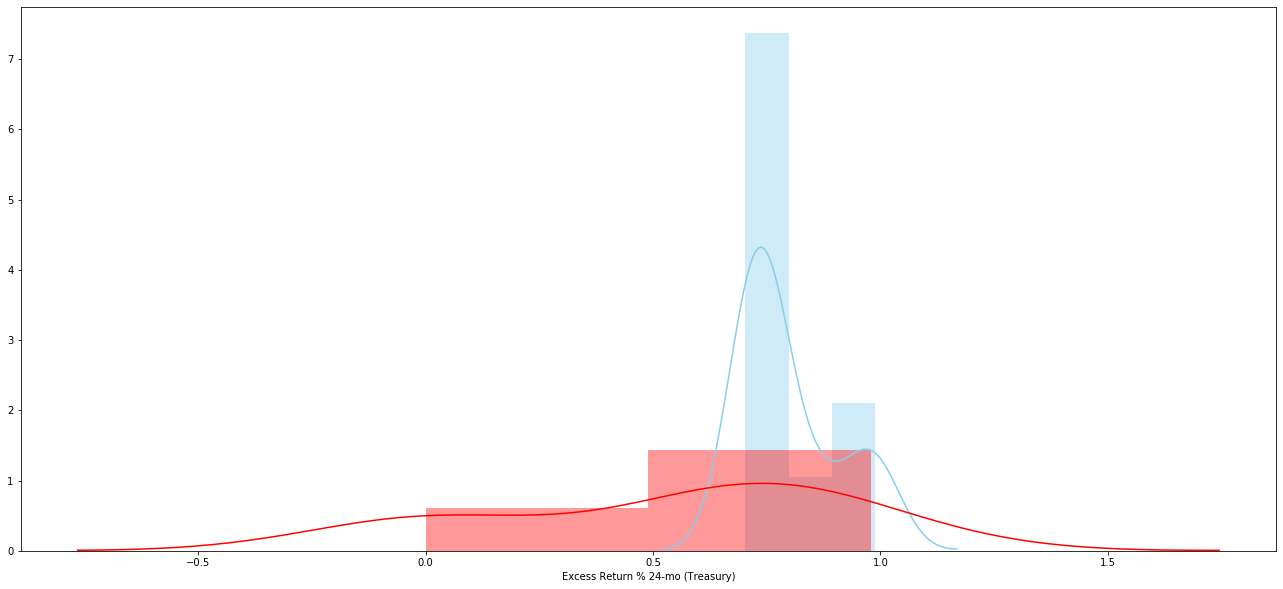

In [74]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Agg)   50.0  0.437922  0.190455  0.026934   
 2                     combined  100.0  0.521325  0.177735  0.017774   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.383796  0.492049  
 2   0.486058  0.556591  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1668
 1                              Degrees of freedom =   98.0000
 2                                               t =    5.2945
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.0589
 7                                       Hedge's g =    1.0508
 8                                   G

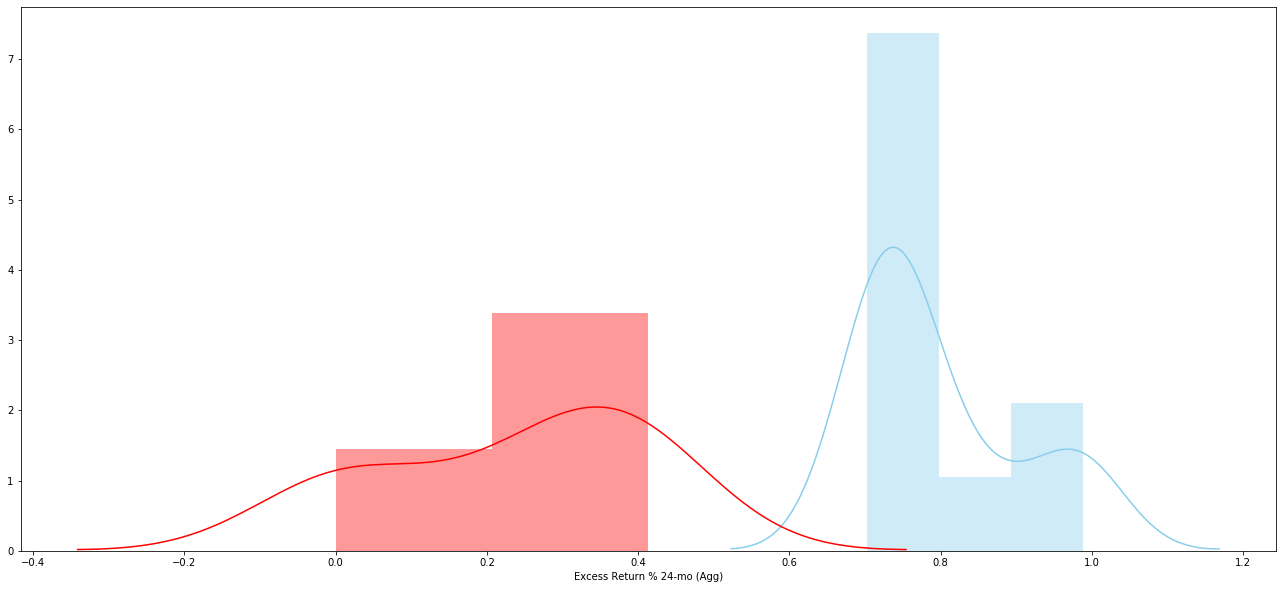

In [75]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [22]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Treasury)   50.0  0.629057  0.181546  0.025675   
 2                          combined  100.0  0.616892  0.151897  0.015190   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.577462  0.680652  
 2   0.586753  0.647032  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...  -0.0243
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.7994
 3                           Two side test p value =    0.4260
 4                          Difference < 0 p value =    0.2130
 5                          Difference > 0 p value =    0.7870
 6                                       Cohen's d =   -0.1599
 7                                       Hedge's g =   -0.1587
 8                

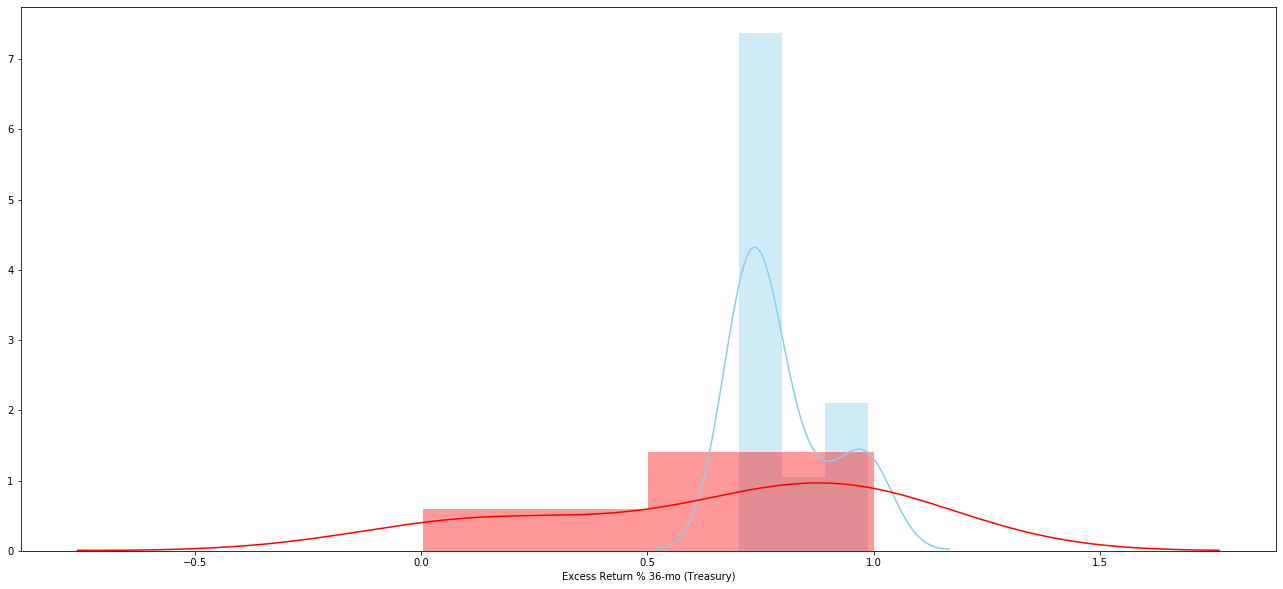

In [76]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Agg)   50.0  0.503970  0.187579  0.026528   
 2                     combined  100.0  0.554349  0.163062  0.016306   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.450660  0.557279  
 2   0.521994  0.586704  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1008
 1                              Degrees of freedom =   98.0000
 2                                               t =    3.2337
 3                           Two side test p value =    0.0017
 4                          Difference < 0 p value =    0.9992
 5                          Difference > 0 p value =    0.0008
 6                                       Cohen's d =    0.6467
 7                                       Hedge's g =    0.6418
 8                                   G

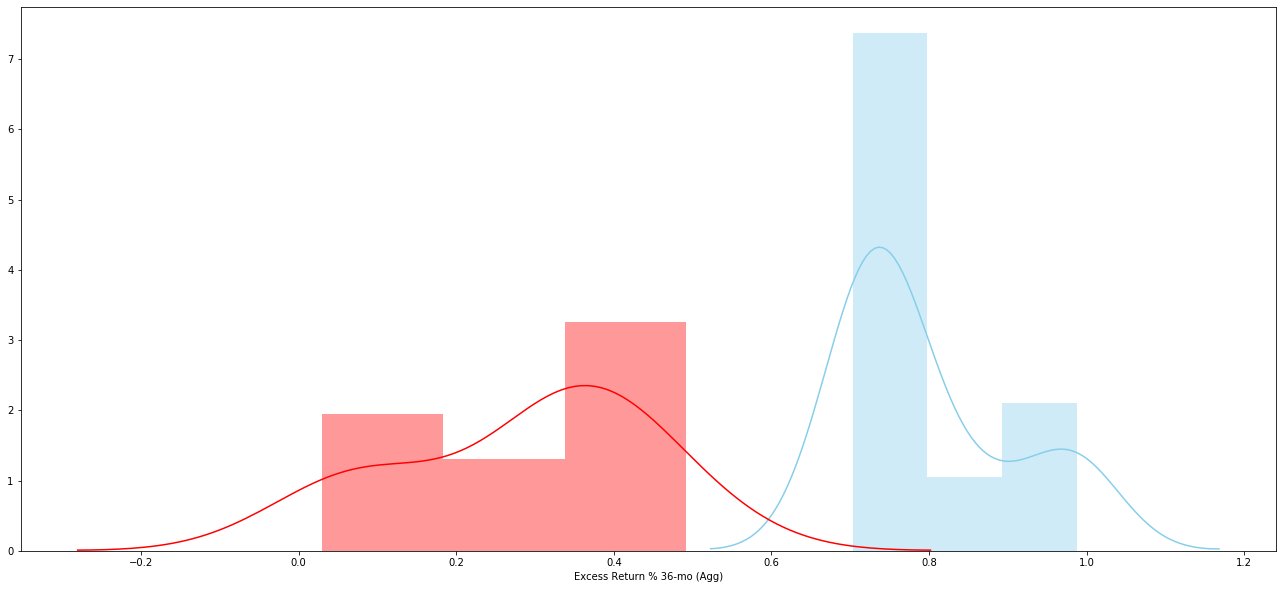

In [77]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [24]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [25]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
des, res = researchpy.ttest(df['OAS'], 
            df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  328.0  0.507810  0.224828  0.012414   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.462612  0.518146  
 2   0.483389  0.532232  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1143
 1                              Degrees of freedom =   326.0000
 2                                               t =     3.3627
 3                           Two side test p value =     0.0009
 4                          Difference < 0 p value =     0.9996
 5                          Difference > 0 p value =     0.0004
 6                                       Cohen's d =     0.5166
 7                                       Hedge's g =     0.5154
 8           

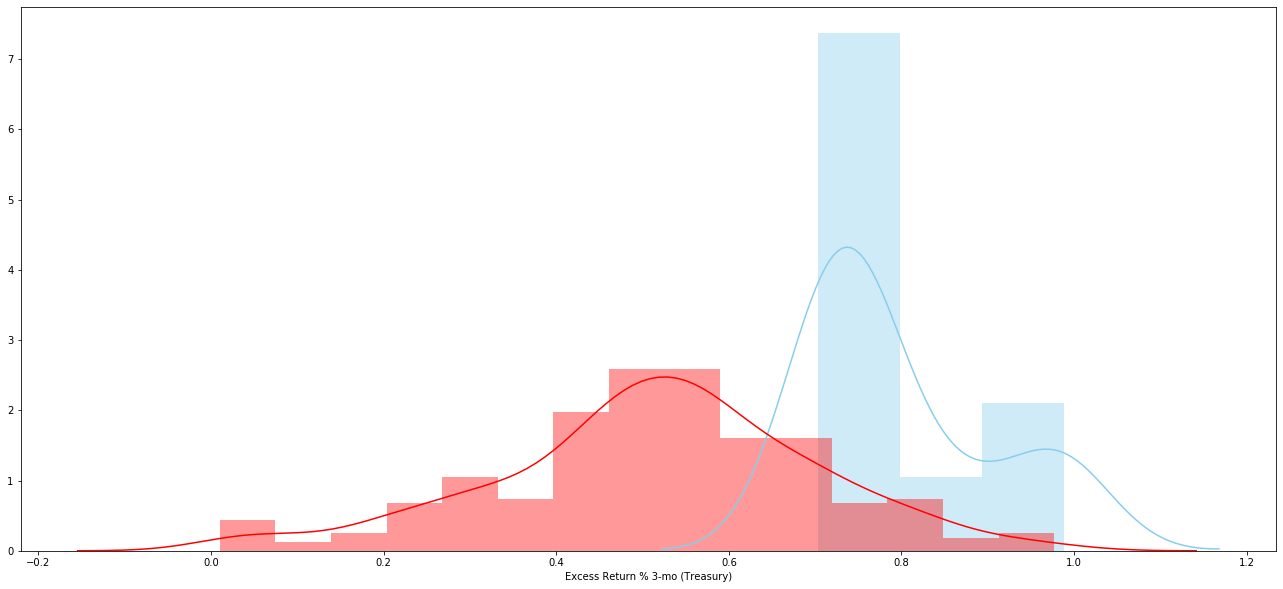

In [80]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  328.0  0.507244  0.211226  0.011663   0.484300   
 
    Interval  
 0  0.637571  
 1  0.515654  
 2  0.530188  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1150
 1                             Degrees of freedom =   326.0000
 2                                              t =     3.6093
 3                          Two side test p value =     0.0004
 4                         Difference < 0 p value =     0.9998
 5                         Difference > 0 p value =     0.0002
 6                                      Cohen's d =     0.5544
 7                                      Hedge's g =     0.5532
 8                                  Glass'

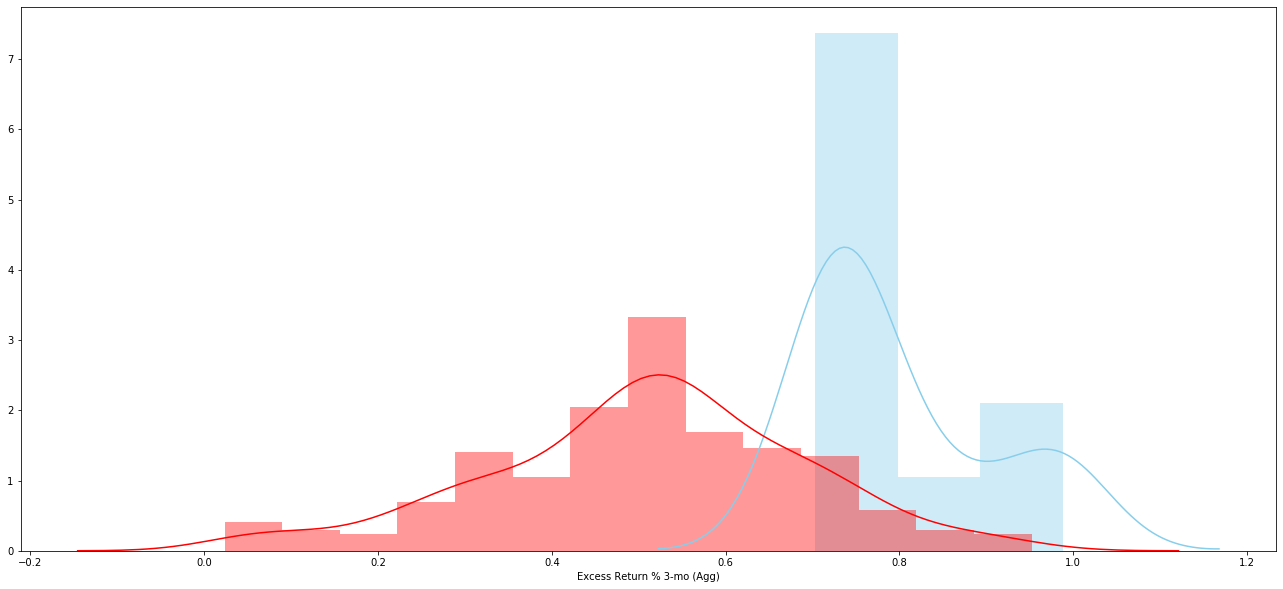

In [82]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [28]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  325.0  0.512029  0.213719  0.011855   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.468691  0.521659  
 2   0.488707  0.535352  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1096
 1                              Degrees of freedom =   323.0000
 2                                               t =     3.3876
 3                           Two side test p value =     0.0008
 4                          Difference < 0 p value =     0.9996
 5                          Difference > 0 p value =     0.0004
 6                                       Cohen's d =     0.5208
 7                                       Hedge's g =     0.5196
 8           

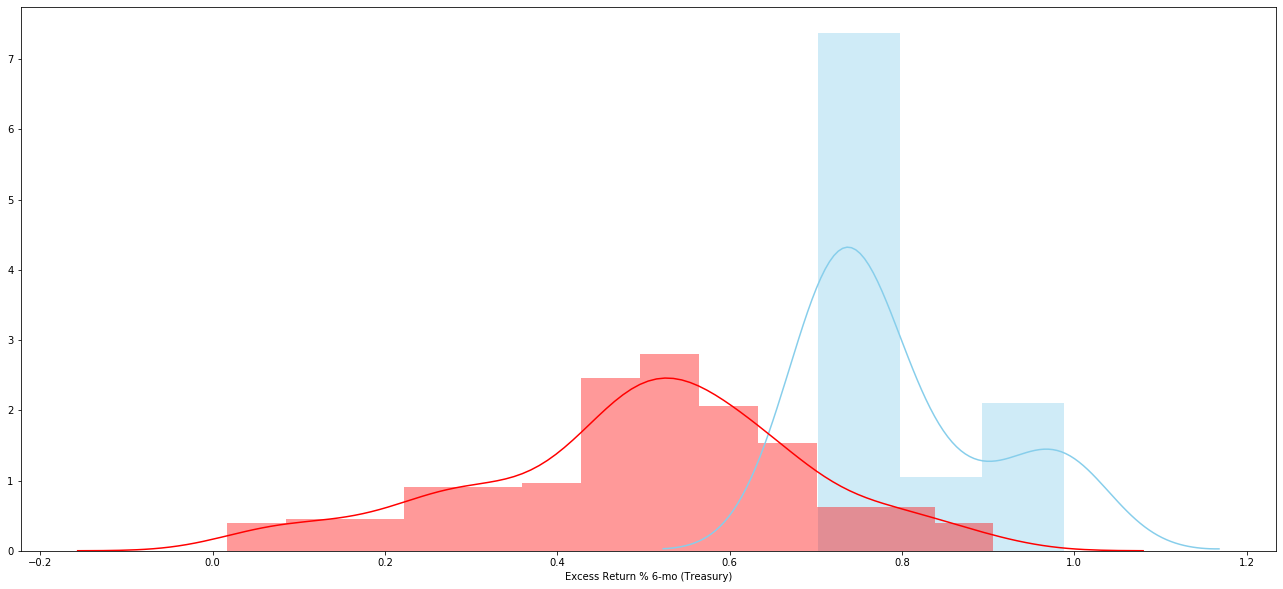

In [83]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  325.0  0.515843  0.215163  0.011935   0.492363   
 
    Interval  
 0  0.637571  
 1  0.526400  
 2  0.539323  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1050
 1                             Degrees of freedom =   323.0000
 2                                              t =     3.2212
 3                          Two side test p value =     0.0014
 4                         Difference < 0 p value =     0.9993
 5                         Difference > 0 p value =     0.0007
 6                                      Cohen's d =     0.4952
 7                                      Hedge's g =     0.4941
 8                                  Glass'

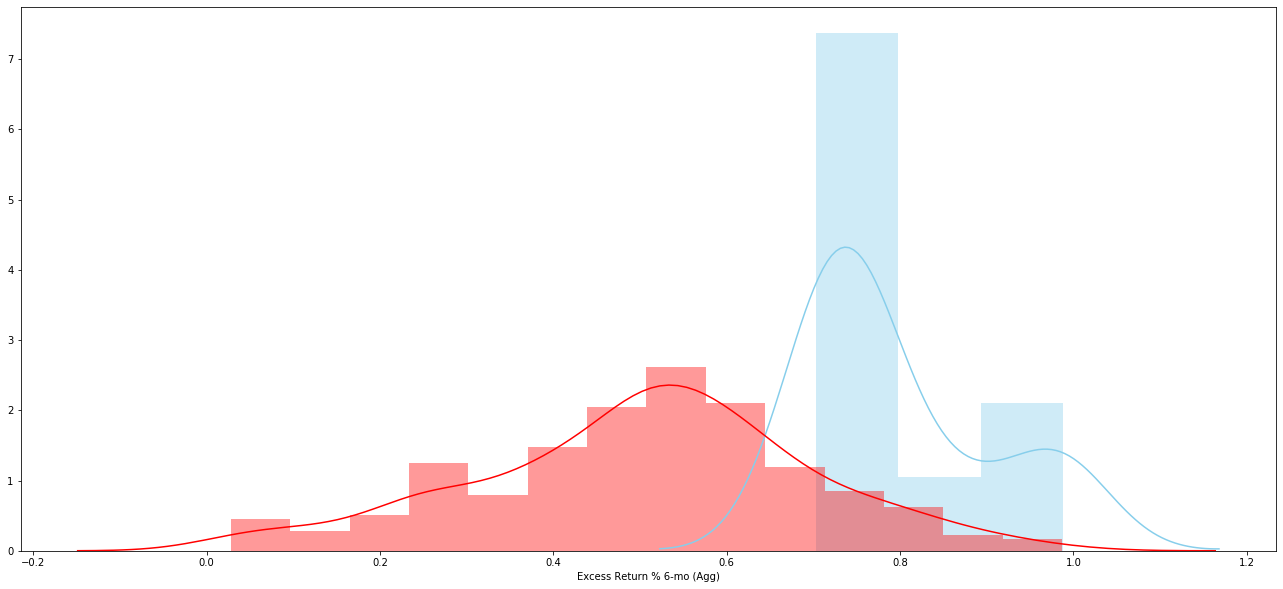

In [84]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [30]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  322.0  0.522693  0.209879  0.011696   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.481380  0.533846  
 2   0.499682  0.545704  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.0971
 1                              Degrees of freedom =   320.0000
 2                                               t =     3.0457
 3                           Two side test p value =     0.0025
 4                          Difference < 0 p value =     0.9987
 5                          Difference > 0 p value =     0.0013
 6                                       Cohen's d =     0.4686
 7                                       Hedge's g =     0.4675
 8           

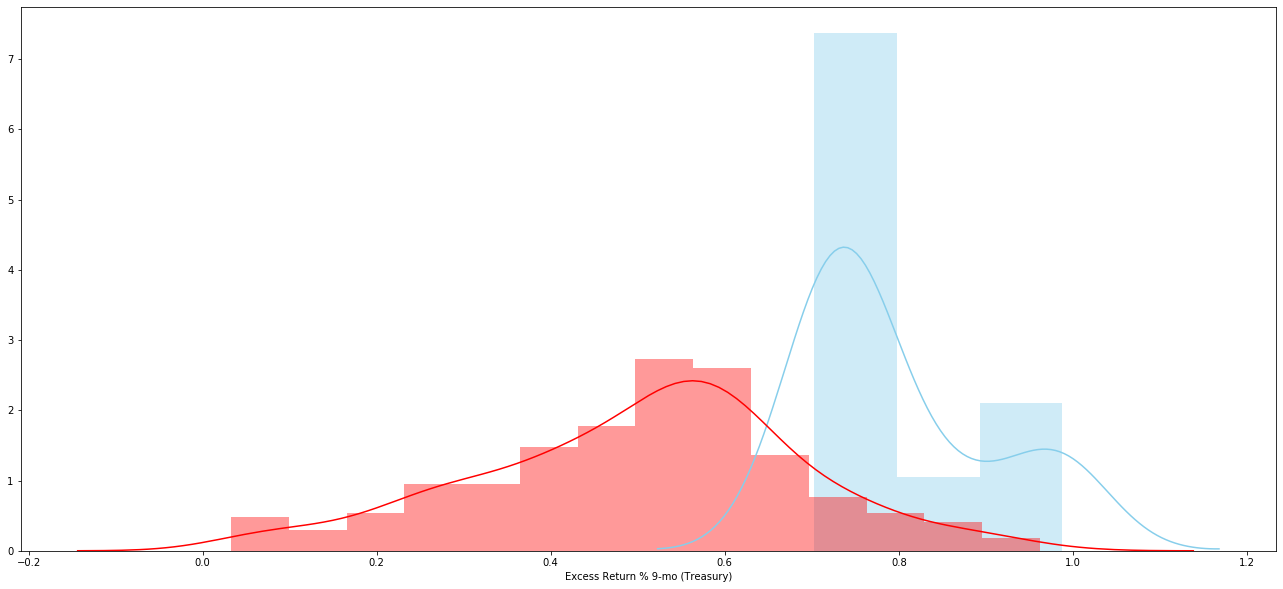

In [85]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  322.0  0.521185  0.204186  0.011379   0.498798   
 
    Interval  
 0  0.637571  
 1  0.531276  
 2  0.543572  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.0989
 1                             Degrees of freedom =   320.0000
 2                                              t =     3.1926
 3                          Two side test p value =     0.0016
 4                         Difference < 0 p value =     0.9992
 5                         Difference > 0 p value =     0.0008
 6                                      Cohen's d =     0.4912
 7                                      Hedge's g =     0.4901
 8                                  Glass'

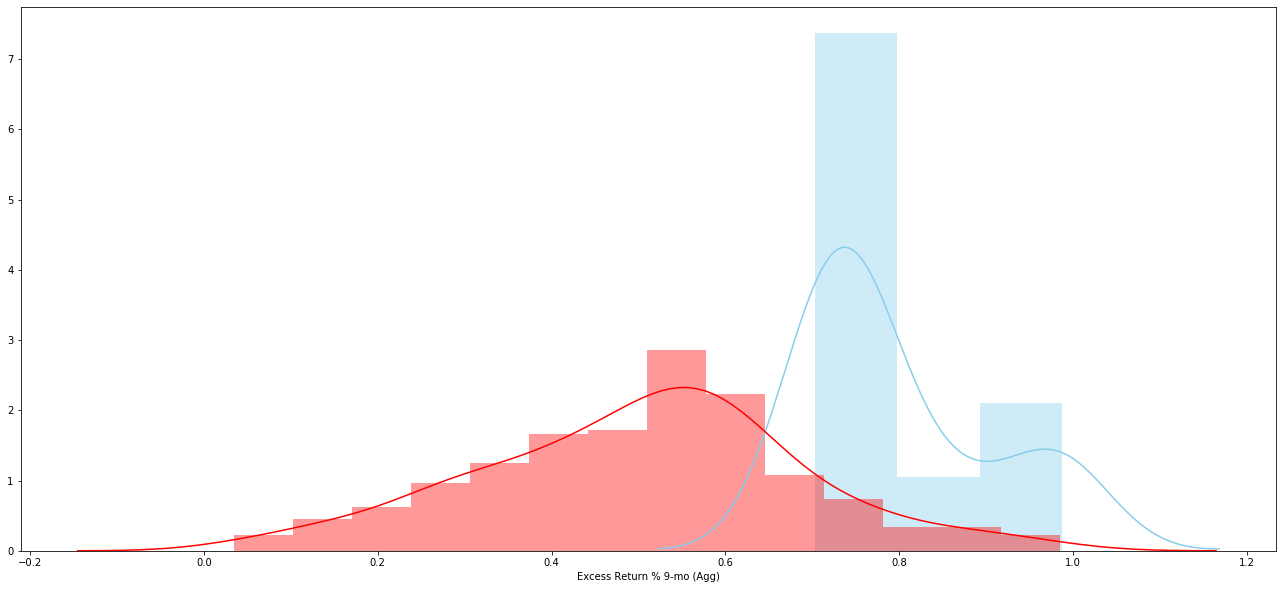

In [86]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [32]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  319.0  0.514009  0.199857  0.011190   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.472216  0.522078  
 2   0.491994  0.536025  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1076
 1                              Degrees of freedom =   317.0000
 2                                               t =     3.5588
 3                           Two side test p value =     0.0004
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.5481
 7                                       Hedge's g =     0.5468
 8       

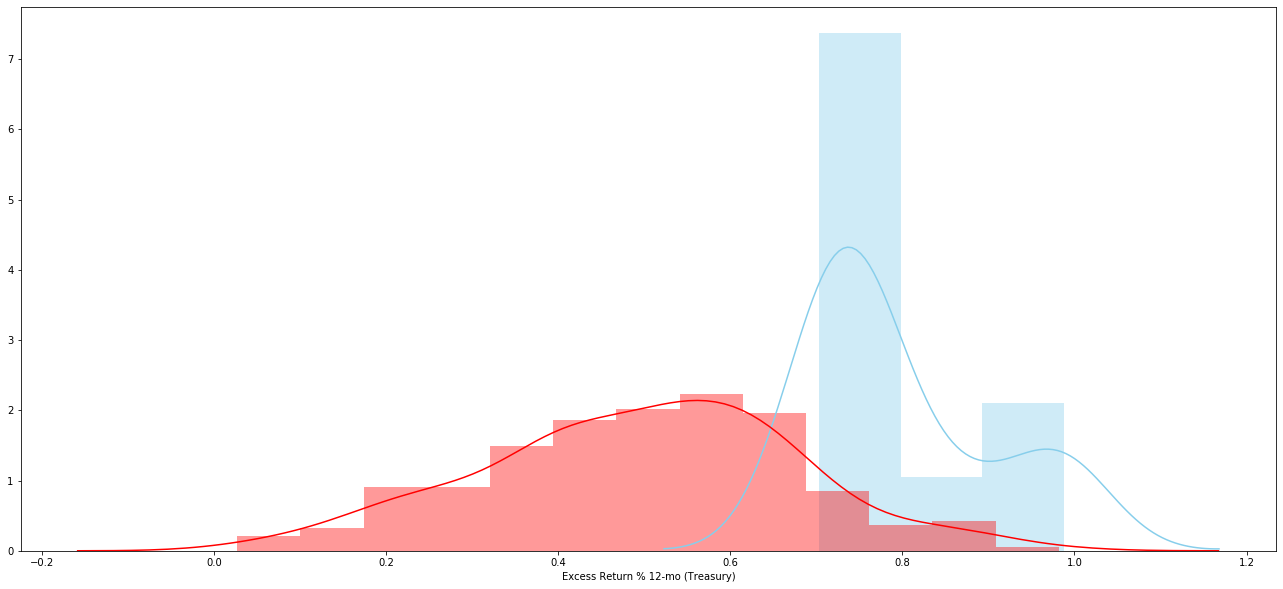

In [87]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  319.0  0.515990  0.194179  0.010872   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.475322  0.523672  
 2   0.494600  0.537380  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1052
 1                              Degrees of freedom =   317.0000
 2                                               t =     3.5838
 3                           Two side test p value =     0.0004
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.5519
 7                                       Hedge's g =     0.5506
 8                           

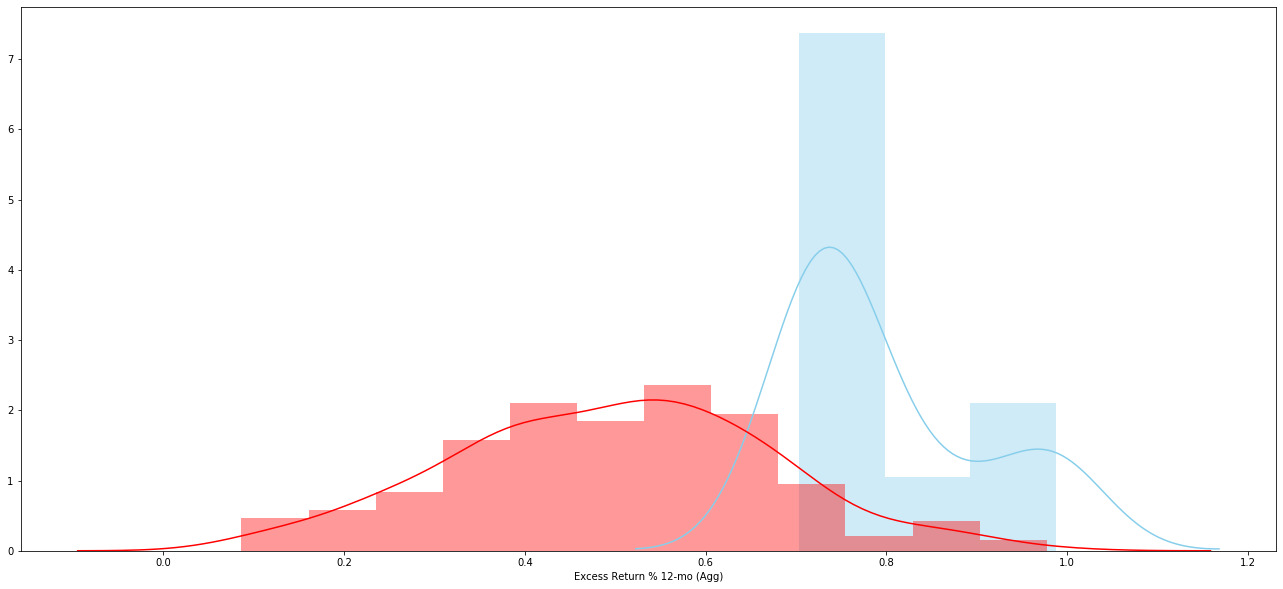

In [88]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [34]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  307.0  0.523184  0.205936  0.011753   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.480806  0.533832  
 2   0.500056  0.546311  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.0974
 1                              Degrees of freedom =   305.0000
 2                                               t =     3.1030
 3                           Two side test p value =     0.0021
 4                          Difference < 0 p value =     0.9990
 5                          Difference > 0 p value =     0.0010
 6                                       Cohen's d =     0.4796
 7                                       Hedge's g =     0.4784
 8       

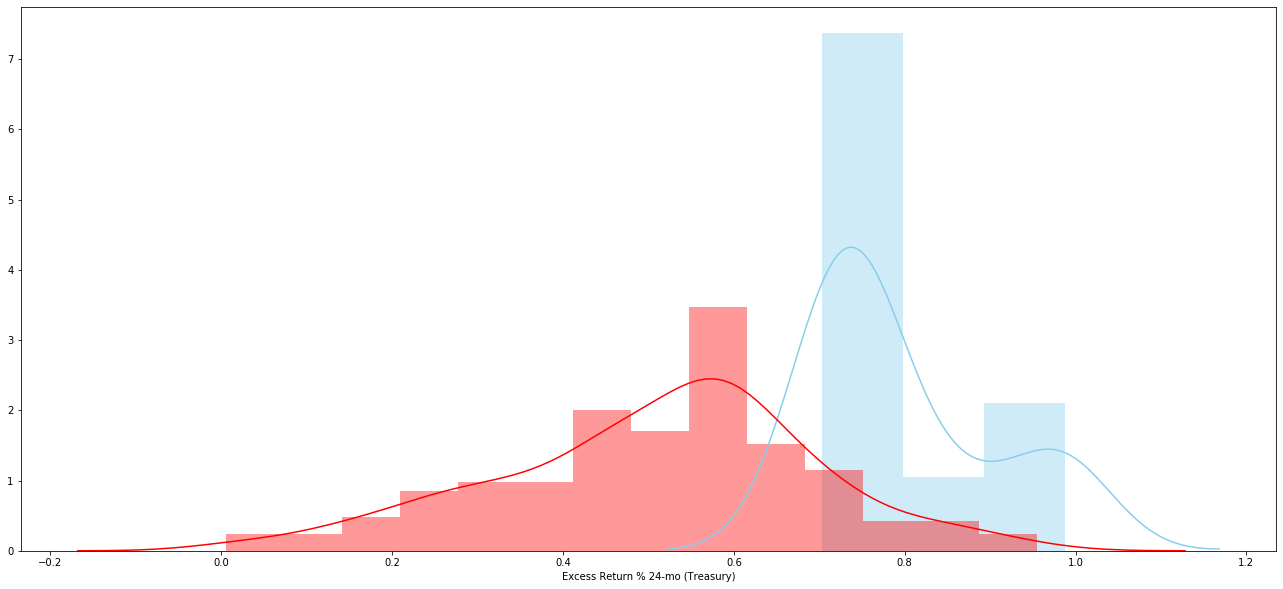

In [89]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [35]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  307.0  0.515590  0.209987  0.011985   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.471252  0.525244  
 2   0.492007  0.539173  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1065
 1                              Degrees of freedom =   305.0000
 2                                               t =     3.3344
 3                           Two side test p value =     0.0010
 4                          Difference < 0 p value =     0.9995
 5                          Difference > 0 p value =     0.0005
 6                                       Cohen's d =     0.5154
 7                                       Hedge's g =     0.5141
 8                           

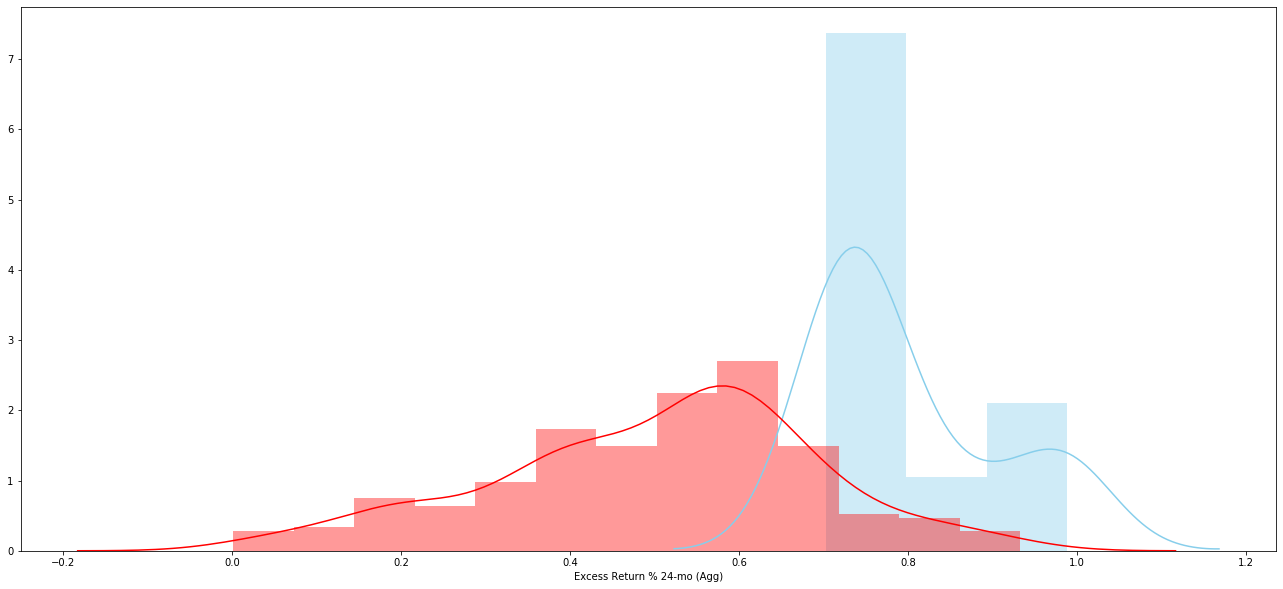

In [90]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [36]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  295.0  0.511997  0.200132  0.011652   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.466840  0.519306  
 2   0.489065  0.534929  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1117
 1                              Degrees of freedom =   293.0000
 2                                               t =     3.6706
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.5696
 7                                       Hedge's g =     0.5682
 8       

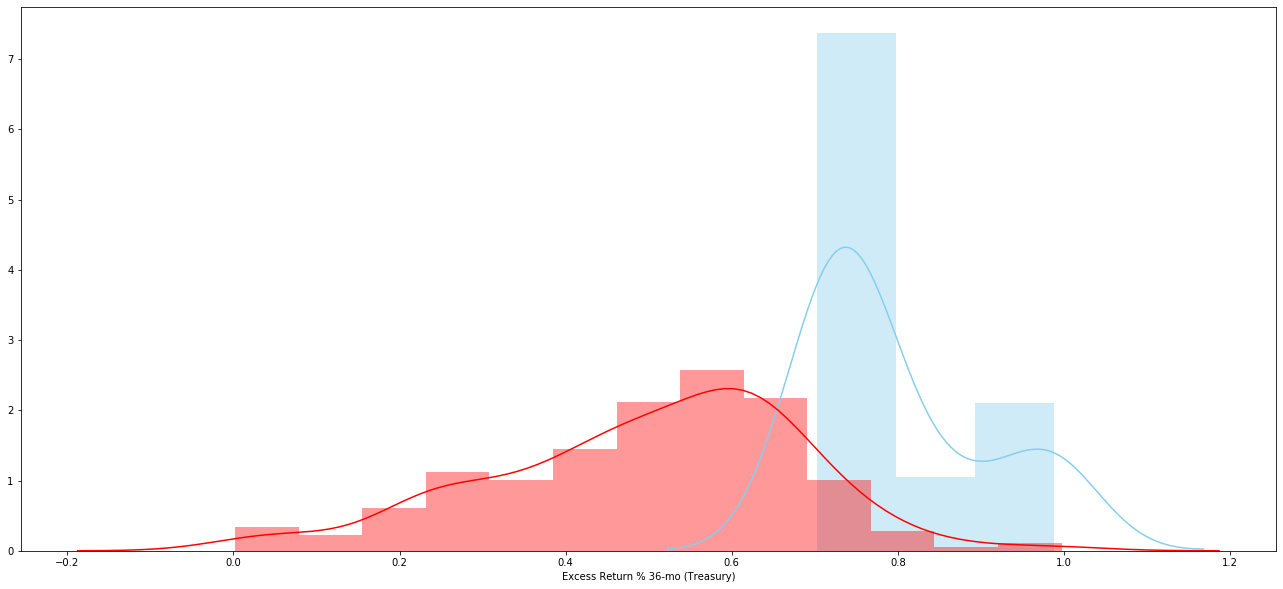

In [91]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [37]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  295.0  0.505179  0.208280  0.012127   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.457540  0.512186  
 2   0.481313  0.529045  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1199
 1                              Degrees of freedom =   293.0000
 2                                               t =     3.7920
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.5884
 7                                       Hedge's g =     0.5869
 8                           

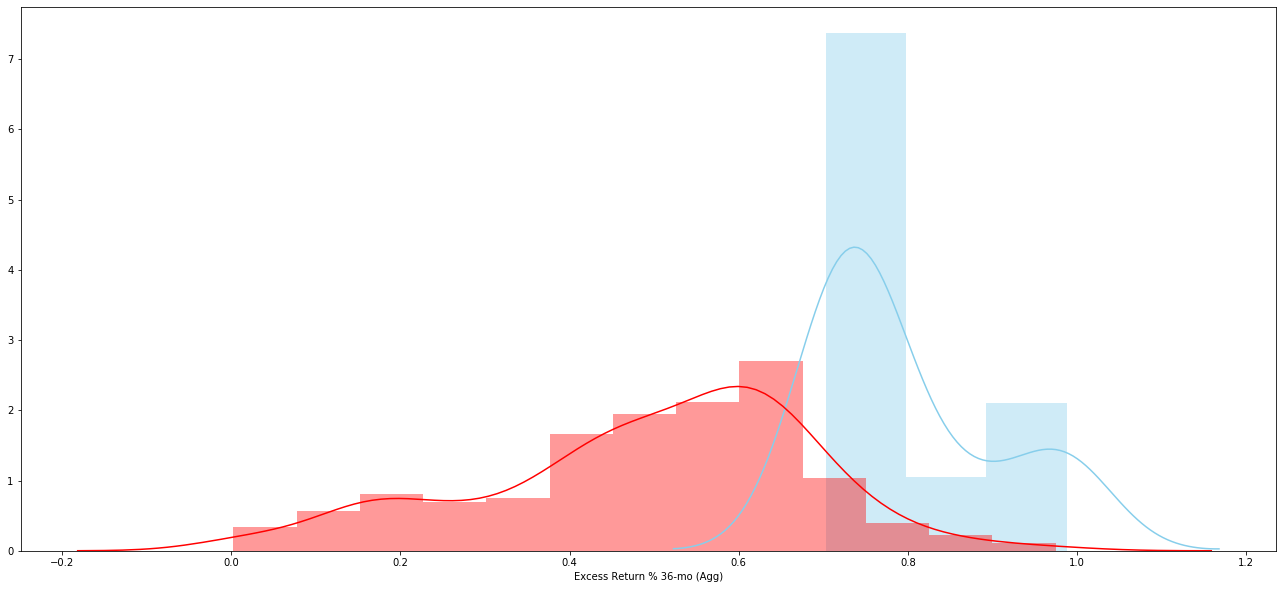

In [92]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [38]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6933333334


In [39]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.797576,0.661822,0.508083,0.624982,0.425016,0.601493,0.352060,0.594982,0.339278,0.524514,0.237056,0.649192,0.286206,1.700000
std,0.107667,0.471054,0.201313,0.443206,0.241237,0.447734,0.223131,0.450416,0.236449,0.381540,0.170167,0.381243,0.154882,0.674949
min,0.703030,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.722727,0.156250,0.327045,0.174496,0.249584,0.135161,0.152925,0.114881,0.106711,0.134522,0.074783,0.311123,0.156160,1.000000
50%,0.748485,0.996611,0.563100,0.799058,0.495308,0.737143,0.430445,0.745148,0.446760,0.660984,0.283615,0.776077,0.341912,2.000000
75%,0.843939,1.000000,0.638386,0.988428,0.610844,1.000000,0.528256,1.000000,0.517798,0.791207,0.378899,0.959660,0.371459,2.000000
max,0.987879,1.000000,0.739269,1.000000,0.713526,1.000000,0.574865,1.000000,0.529673,0.979469,0.413066,1.000000,0.491414,3.000000


In [40]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 3-mo (Treasury)  10.0  0.661822  0.471054  0.148960   
 2                         combined  20.0  0.729699  0.339776  0.075976   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.324850  0.998794  
 2   0.570679  0.888719  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.1358
 1                              Degrees of freedom =   18.0000
 2                                               t =    0.8884
 3                           Two side test p value =    0.3860
 4                          Difference < 0 p value =    0.8070
 5                          Difference > 0 p value =    0.1930
 6                                       Cohen's d =    0.3973
 7                                       Hedge's g =    0.3805
 8                        

In [41]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 3-mo (Agg)  10.0  0.508083  0.201313  0.063661   0.364073   
 2                    combined  20.0  0.652830  0.216199  0.048344   0.551645   
 
    Interval  
 0  0.874596  
 1  0.652094  
 2  0.754014  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2895
 1                             Degrees of freedom =   18.0000
 2                                              t =    4.0099
 3                          Two side test p value =    0.0008
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    1.7933
 7                                      Hedge's g =    1.7175
 8                                  Glass's delta =    

In [42]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 6-mo (Treasury)  10.0  0.624982  0.443206  0.140154   
 2                         combined  20.0  0.711279  0.326155  0.072930   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.307931  0.942032  
 2   0.558634  0.863924  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.1726
 1                              Degrees of freedom =   18.0000
 2                                               t =    1.1967
 3                           Two side test p value =    0.2470
 4                          Difference < 0 p value =    0.8765
 5                          Difference > 0 p value =    0.1235
 6                                       Cohen's d =    0.5352
 7                                       Hedge's g =    0.5125
 8                        

In [43]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 6-mo (Agg)  10.0  0.425016  0.241237  0.076286   0.252446   
 2                    combined  20.0  0.611296  0.263787  0.058985   0.487840   
 
    Interval  
 0  0.874596  
 1  0.597587  
 2  0.734752  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.3726
 1                             Degrees of freedom =   18.0000
 2                                              t =    4.4597
 3                          Two side test p value =    0.0003
 4                         Difference < 0 p value =    0.9998
 5                         Difference > 0 p value =    0.0002
 6                                      Cohen's d =    1.9944
 7                                      Hedge's g =    1.9102
 8                                  Glass's delta =    

In [44]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 9-mo (Treasury)  10.0  0.601493  0.447734  0.141586   
 2                         combined  20.0  0.699534  0.332516  0.074353   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.281203  0.921783  
 2   0.543912  0.855157  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.1961
 1                              Degrees of freedom =   18.0000
 2                                               t =    1.3465
 3                           Two side test p value =    0.1948
 4                          Difference < 0 p value =    0.9026
 5                          Difference > 0 p value =    0.0974
 6                                       Cohen's d =    0.6022
 7                                       Hedge's g =    0.5767
 8                        

In [45]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 9-mo (Agg)  10.0  0.352060  0.223131  0.070560   0.192441   
 2                    combined  20.0  0.574818  0.285145  0.063760   0.441366   
 
    Interval  
 0  0.874596  
 1  0.511678  
 2  0.708270  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.4455
 1                             Degrees of freedom =   18.0000
 2                                              t =    5.6866
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    2.5431
 7                                      Hedge's g =    2.4357
 8                                  Glass's delta =    

In [46]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 12-mo (Treasury)  10.0  0.594982  0.450416  0.142434   
 2                          combined  20.0  0.696279  0.335247  0.074964   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.272774  0.917190  
 2   0.539378  0.853179  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2026
 1                              Degrees of freedom =   18.0000
 2                                               t =    1.3834
 3                           Two side test p value =    0.1835
 4                          Difference < 0 p value =    0.9083
 5                          Difference > 0 p value =    0.0917
 6                                       Cohen's d =    0.6187
 7                                       Hedge's g =    0.5925
 8                    

In [47]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 12-mo (Agg)  10.0  0.339278  0.236449  0.074772   0.170132   
 2                     combined  20.0  0.568427  0.295376  0.066048   0.430187   
 
    Interval  
 0  0.874596  
 1  0.508423  
 2  0.706667  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.4583
 1                              Degrees of freedom =   18.0000
 2                                               t =    5.5782
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    2.4946
 7                                       Hedge's g =    2.3892
 8                                   Glass

In [48]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 24-mo (Treasury)  10.0  0.524514  0.381540  0.120654   
 2                          combined  20.0  0.661045  0.306706  0.068581   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.251577  0.797451  
 2   0.517502  0.804587  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2731
 1                              Degrees of freedom =   18.0000
 2                                               t =    2.1781
 3                           Two side test p value =    0.0429
 4                          Difference < 0 p value =    0.9785
 5                          Difference > 0 p value =    0.0215
 6                                       Cohen's d =    0.9741
 7                                       Hedge's g =    0.9329
 8                    

In [49]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 24-mo (Agg)  10.0  0.237056  0.170167  0.053812   0.115326   
 2                     combined  20.0  0.517316  0.319198  0.071375   0.367927   
 
    Interval  
 0  0.874596  
 1  0.358786  
 2  0.666705  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.5605
 1                              Degrees of freedom =   18.0000
 2                                               t =    8.8024
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    3.9365
 7                                       Hedge's g =    3.7702
 8                                   Glass

In [50]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 36-mo (Treasury)  10.0  0.649192  0.381243  0.120560   
 2                          combined  20.0  0.723384  0.283078  0.063298   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.376467  0.921917  
 2   0.590899  0.855869  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.1484
 1                              Degrees of freedom =   18.0000
 2                                               t =    1.1845
 3                           Two side test p value =    0.2516
 4                          Difference < 0 p value =    0.8742
 5                          Difference > 0 p value =    0.1258
 6                                       Cohen's d =    0.5297
 7                                       Hedge's g =    0.5073
 8                    

In [51]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 36-mo (Agg)  10.0  0.286206  0.154882  0.048978   0.175410   
 2                     combined  20.0  0.541891  0.292694  0.065448   0.404906   
 
    Interval  
 0  0.874596  
 1  0.397001  
 2  0.678876  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.5114
 1                              Degrees of freedom =   18.0000
 2                                               t =    8.5729
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    3.8339
 7                                       Hedge's g =    3.6719
 8                                   Glass

# Now lets run the same t-test but with High spreads to all returns

In [52]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [53]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
des, res = researchpy.ttest(df['OAS'], 
            df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  288.0  0.501046  0.238577  0.014058   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.462612  0.518146  
 2   0.473375  0.528716  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.3072
 1                              Degrees of freedom =   286.0000
 2                                               t =     4.1097
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3228
 7                                       Hedge's g =     1.3193
 8           

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  288.0  0.500400  0.223948  0.013196   0.474427   
 
    Interval  
 0  0.874596  
 1  0.515654  
 2  0.526374  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.3079
 1                             Degrees of freedom =   286.0000
 2                                              t =     4.4060
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4181
 7                                      Hedge's g =     1.4144
 8                                  Glass'

In [56]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  285.0  0.505786  0.226916  0.013441   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.468691  0.521659  
 2   0.479329  0.532243  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.3024
 1                              Degrees of freedom =   283.0000
 2                                               t =     4.2629
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3724
 7                                       Hedge's g =     1.3687
 8           

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  285.0  0.510135  0.228582  0.013540   0.483483   
 
    Interval  
 0  0.874596  
 1  0.526400  
 2  0.536786  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2979
 1                             Degrees of freedom =   283.0000
 2                                              t =     4.1630
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3402
 7                                      Hedge's g =     1.3366
 8                                  Glass'

In [58]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  282.0  0.517895  0.223227  0.013293   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.481380  0.533846  
 2   0.491729  0.544062  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2900
 1                              Degrees of freedom =   280.0000
 2                                               t =     4.1489
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3359
 7                                       Hedge's g =     1.3323
 8           

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   10.0  0.797576  0.107667  0.034047   0.720555   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  282.0  0.516174  0.217073  0.012927   0.490729   
 
    Interval  
 0  0.874596  
 1  0.531276  
 2  0.541619  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2917
 1                             Degrees of freedom =   280.0000
 2                                              t =     4.3022
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3852
 7                                      Hedge's g =     1.3815
 8                                  Glass'

In [60]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  279.0  0.507915  0.212335  0.012712   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.472216  0.522078  
 2   0.482891  0.532940  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.3004
 1                              Degrees of freedom =   277.0000
 2                                               t =     4.5461
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4641
 7                                       Hedge's g =     1.4601
 8       

In [61]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  279.0  0.510180  0.206287  0.012350   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.475322  0.523672  
 2   0.485869  0.534492  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2981
 1                              Degrees of freedom =   277.0000
 2                                               t =     4.6502
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4976
 7                                       Hedge's g =     1.4936
 8                           

In [62]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  267.0  0.518190  0.219715  0.013446   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.480806  0.533832  
 2   0.491715  0.544665  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2903
 1                              Degrees of freedom =   265.0000
 2                                               t =     4.2265
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3623
 7                                       Hedge's g =     1.3584
 8       

In [63]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  267.0  0.509459  0.223865  0.013700   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.471252  0.525244  
 2   0.482484  0.536434  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2993
 1                              Degrees of freedom =   265.0000
 2                                               t =     4.2813
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3800
 7                                       Hedge's g =     1.3761
 8                           

In [64]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  255.0  0.505014  0.213691  0.013382   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.466840  0.519306  
 2   0.478661  0.531368  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.3045
 1                              Degrees of freedom =   253.0000
 2                                               t =     4.5879
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4801
 7                                       Hedge's g =     1.4757
 8       

In [65]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   10.0  0.797576  0.107667  0.034047   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  255.0  0.497126  0.222253  0.013918   
 
    95% Conf.  Interval  
 0   0.720555  0.874596  
 1   0.457540  0.512186  
 2   0.469717  0.524536  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3127
 1                              Degrees of freedom =   253.0000
 2                                               t =     4.5254
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4600
 7                                       Hedge's g =     1.4556
 8                           